# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [338]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [339]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

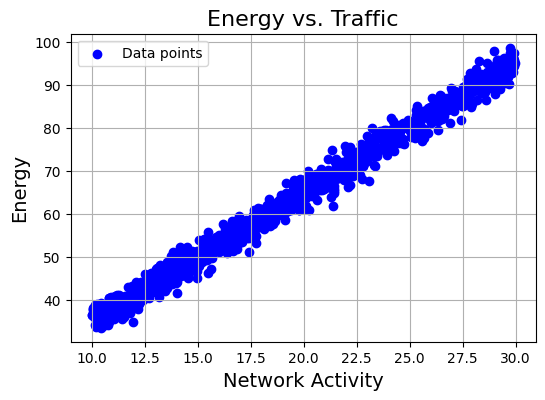

In [340]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### Implementation

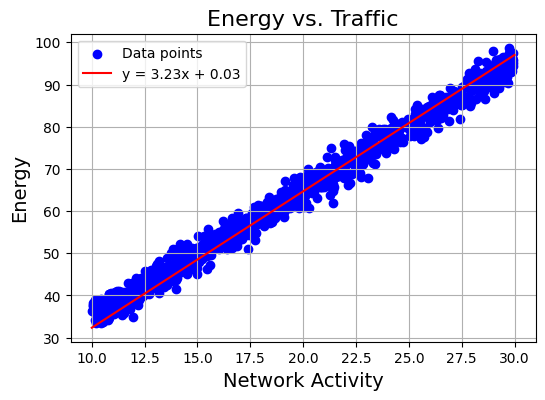

In [341]:
lr = LinearRegression(0.001, 100)
                    
lr.fit(data['Net_Activity'], data['Energy'])

predictions_3 = lr.predict(data['Net_Activity'])

theta = lr.theta
a = theta[0][0]
b = theta[1][0]
x = np.linspace(10,30,100)
y = a*x + b

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.plot(x, y, c='red', label='y = {:.2f}x + {:.2f}'.format(a, b))
plt.legend()
plt.show()

### Discussion
#### 2a - Visualize and derive the curve / formula
The curve is shown in the diagram above.  Depending on amount of epochs and learning rate, the line formula changes. The formula with learning rate 0.001 and 100 epochs is y = 3.23 * x + 0.03. For energy-traffic, this means that energy = 3.23 * traffic + 0.03.

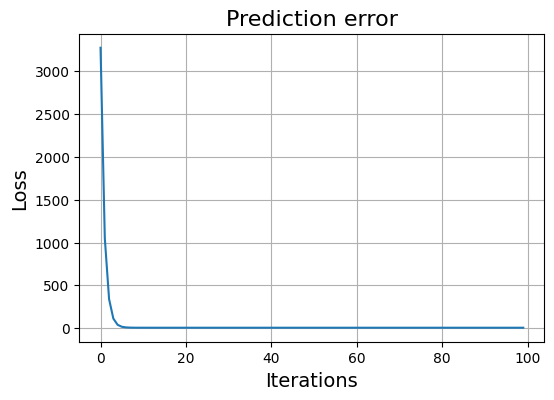

In [342]:
error_distribution = lr.losses

plt.figure(figsize=(6, 4))
plt.plot(error_distribution)
plt.grid(True)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Prediction error', fontsize=16)
plt.show()

#### 2b - What is an ubiased estimator?
An unbiased estimator is one that has zero bias. This means that the difference between the prediction and the expected value is zero. In the case of linear regression, the 'b' (0.03) is the bias. The estimator of the data can be seen as biased with this value as an offset. This b does not change the line / relationship between the energy and traffic, but shifts it with a bias. 


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [373]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

## Visualize the data

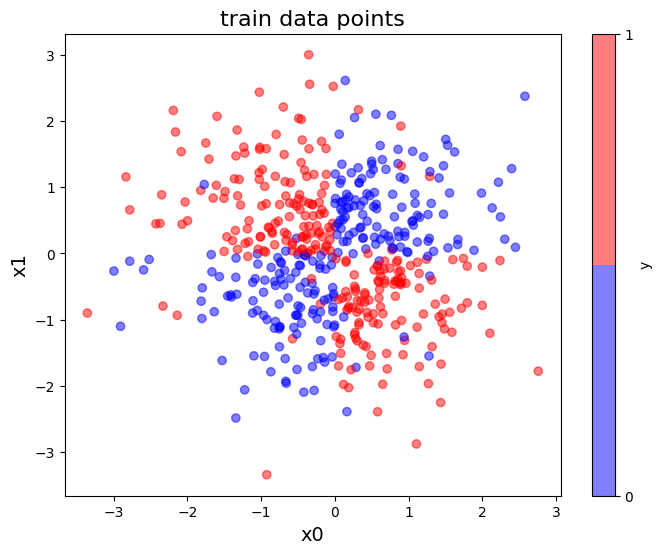

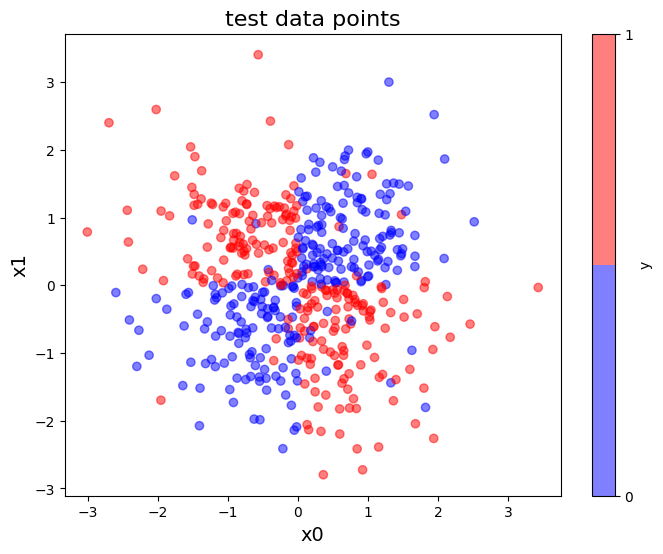

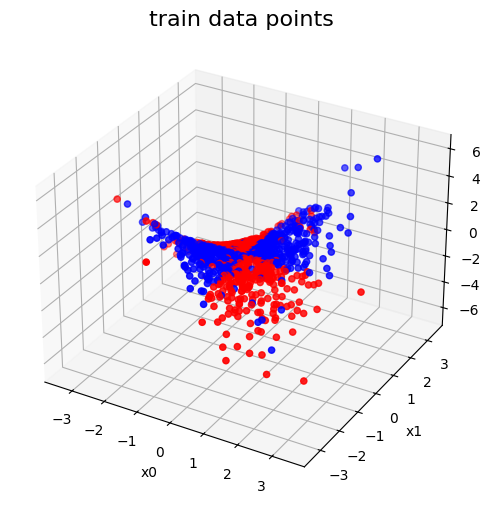

In [374]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

modified_data = np.array(data['x0'] * data['x1']).reshape(-1, 1)

# Define a discrete colormap
cmap = mcolors.ListedColormap(['blue', 'red'])

# Scatter plot for x0 vs x1 colored by the target variable y
plt.figure(figsize=(8, 6))
plt.title('train data points', fontsize=16)

sc = plt.scatter(train['x0'], train['x1'], c=train['y'], cmap=cmap, alpha=0.5)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)

cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])
cbar.set_label('y')

plt.figure(figsize=(8, 6))
plt.title('test data points', fontsize=16)
sc = plt.scatter(test['x0'], test['x1'], c=test['y'], cmap=cmap, alpha=0.5)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)

cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])
cbar.set_label('y')

# 3d plot of xo, x1 and modified data with color of y
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x0'], data['x1'], modified_data, c=data['y'], cmap=cmap)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x0 * x1')
plt.title('train data points', fontsize=16)
plt.show()



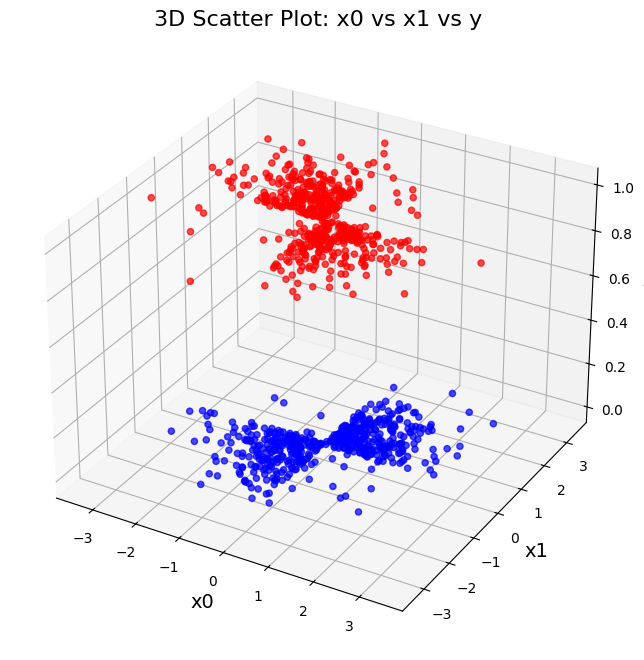

In [375]:
# 3D Scatter plot for x0, x1, and y
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x0'], data['x1'], data['y'], c=data['y'], cmap='bwr', alpha=0.7)

ax.set_xlabel('x0', fontsize=14)
ax.set_ylabel('x1', fontsize=14)
ax.set_zlabel('y', fontsize=14)
ax.set_title('3D Scatter Plot: x0 vs x1 vs y', fontsize=16)
plt.show()


## Implement logistic regression

In [376]:
from logistic_regression import LogisticRegression # <--- This is your implementation

Test Accuracy: 0.9460


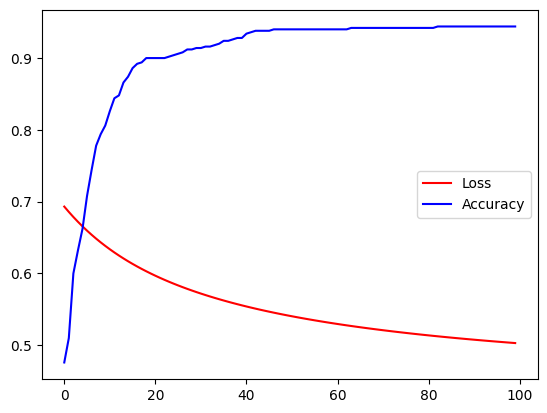

In [377]:
# Prepare the training and testing datasets
X_train = np.array(train['x0']*train['x1']).reshape(-1,1)
y_train = np.array(train['y'])

X_test = np.array(test['x0']*test['x1']).reshape(-1,1)
y_test = np.array(test['y'])

# Initialize the model
train_epochs = 100
log_lr = LogisticRegression(learning_rate=0.1, epochs=train_epochs, classify_threshold=0.514)

# Fit the model on the training data
log_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_3 = log_lr.predict(X_test)

# Evaluate the model
accuracy = log_lr.accuracy(y_test, predictions_3)

print(f'Test Accuracy: {accuracy:.4f}')

epoch_list = np.arange(0, train_epochs,1)
plt.plot(epoch_list, log_lr.losses, c='red', label="Loss")
plt.plot(epoch_list, log_lr.accuracies, c='blue', label="Accuracy")
plt.legend()
plt.show()

a. Explain poor initial performance and your improvements  
The initial performance without altering the training data was bad, and resulted in poor results (around 0.5 accuracy, which is the same as a coin flip). This is probably due to the strong correlation between x0 and x1, which from the plots seem to be a deciding factor in the given class for a data point. The logistic regression was not intuitively picking up on this, and therefore the model was improved by altering the data insted. It was trained with data that consist of x0 multiplied with x1, which made the correlation clear to the model. 


b. What is the model's inductive bias. Why is it important?  
The model's inductive bias is the use of a sigmoid functions which maps the prediction to a number between 0 and 1. This will correspond to the values of y, which are either 0 or 1. By using a threshold, the predicted number between 0 and 1 can be cast to either class based on what side of the threshold the prediction lies in. Using a threshold of 0.514 for classification yielded the best results (accuracy)

c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

Test Accuracy: 0.9500


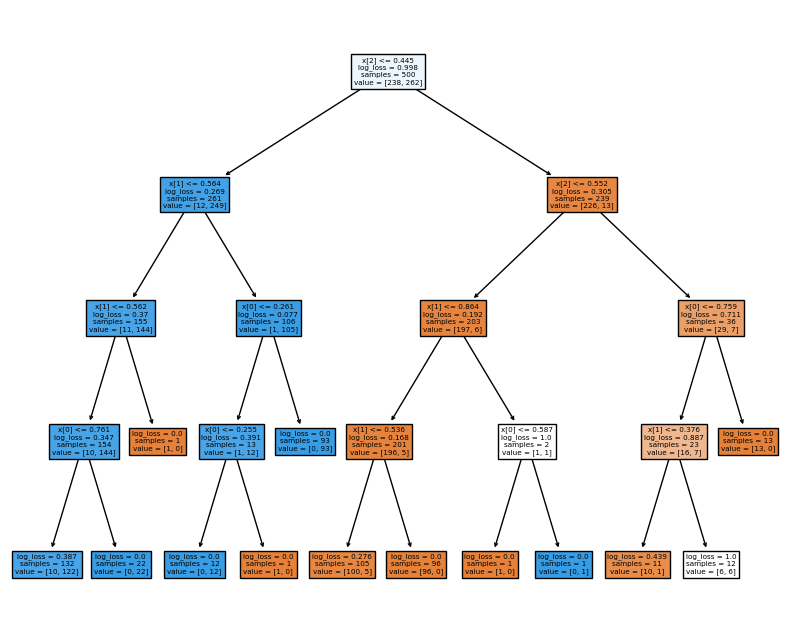

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler

# Initialize the model
dt = DecisionTreeClassifier(max_depth=4, criterion='log_loss')

# Fit the model on the training data
dec_X_train = np.array([train['x0'], train['x1'], train['x0']*train['x1']]).T
dec_X_test = np.array([test['x0'], test['x1'], test['x0']*test['x1']]).T

dec_y_train = np.array(train['y'])
dec_y_test = np.array(test['y'])

# Normalize the data
dec_scaler = MinMaxScaler()
dec_X_train = dec_scaler.fit_transform(dec_X_train)
dec_X_test = dec_scaler.transform(dec_X_test)

dt.fit(dec_X_train, dec_y_train)

# Make predictions on the test set
predictions_3 = dt.predict(dec_X_test)
score = dt.score(dec_X_test, dec_y_test)

print(f'Test Accuracy: {score:.4f}')

plt.figure(figsize=(10, 8))
plot_tree(dt, filled=True)
plt.show()

#### c) Decision tree

The problem is solved with high accuracy by sklearn's DecisionTreeClassifier. It achieved high accuracy without altering the data, but even higher with additional features. 

d. Plot the ROC curve

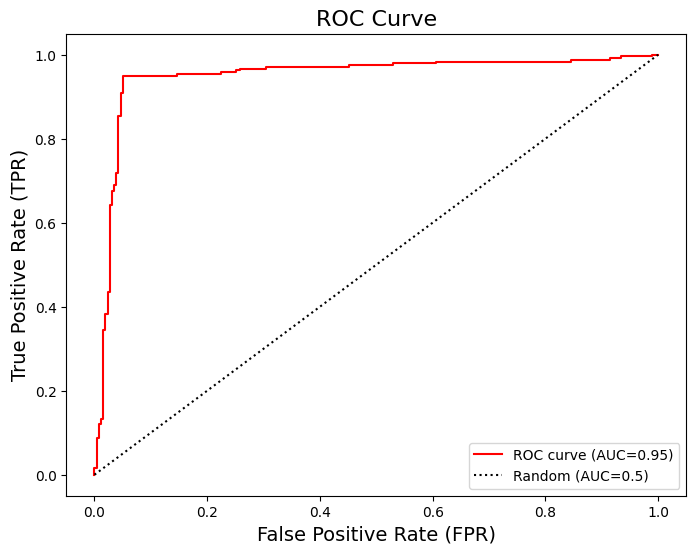

In [381]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

X_test_3 = np.array([test['x0'] * test['x1']]).T

y_train = np.array(train['y'])
y_test_3 = np.array(test['y'])

probabilities = log_lr.predict_proba(X_test_3)
fpr, tpr, thresholds = roc_curve(y_test_3, probabilities, pos_label=1)

auc = round(roc_auc_score(y_test_3, probabilities), 2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f"ROC curve (AUC={auc})")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend()
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [382]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Visualize the data

In [383]:
train.head()

,data_stream_0,data_stream_1,data_stream_2,data_stream_3,data_stream_4,data_stream_5,data_stream_6,data_stream_7,data_stream_8,data_stream_9,data_stream_10,target
0,1.591652,0.022000,0.066204,-4.470,-0.590364,0.916947,0.091906,0.799122,0.169556,0.491818,-0.434949,1
1,-0.658723,-1.105319,-0.249185,-9.140,-1.170606,-1.195158,-0.247944,-0.091012,0.187395,0.180210,0.436154,1
2,1.947652,0.452603,-0.050377,-1.936,-0.482726,-0.437251,2.435959,-0.197507,-1.834104,-0.982665,1.366686,0
3,1.268409,0.858887,1.085982,0.044,-0.117343,0.350743,0.891113,0.612502,1.572513,1.759443,1.552180,0
4,-1.040814,0.391381,-1.722088,-4.336,0.613355,0.721647,-1.406076,0.583793,-0.380348,-0.731454,0.549274,0


In [384]:
train.describe()

,data_stream_0,data_stream_1,data_stream_2,data_stream_3,data_stream_4,data_stream_5,data_stream_6,data_stream_7,data_stream_8,data_stream_9,data_stream_10,target
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.231075,-0.001476,0.018874,0.092223,0.010275,0.001074,-0.259861,0.052033,0.014515,0.008584,0.005827,0.192750
std,1.165611,0.998400,1.008527,5.770973,1.003127,1.011421,1.101096,0.860646,1.007295,1.003524,1.022364,0.394483
min,-5.323960,-3.601152,-4.498593,-9.999000,-3.565192,-4.010170,-4.240089,-3.840188,-3.356489,-4.604821,-3.744184,0.000000
25%,-0.962776,-0.671684,-0.650891,-4.921500,-0.674551,-0.691569,-0.971924,-0.388031,-0.655914,-0.667893,-0.676547,0.000000
50%,-0.231339,-0.006113,0.019951,0.139000,0.022558,-0.004920,-0.257525,0.158764,0.017438,0.010378,-0.001679,0.000000
75%,0.500118,0.682696,0.709670,5.089500,0.689996,0.690551,0.485159,0.585619,0.689743,0.680877,0.708990,0.000000
max,4.556261,3.568551,3.832173,9.996000,3.541632,3.627054,3.314975,3.574871,3.450825,3.753086,3.558211,1.000000


In [386]:
# multiply data_stream_3 by 1000 and modulo 2
train['data_stream_3_dec'] = (train['data_stream_3']*1000).astype(int) % 2
test['data_stream_3_dec'] = (test['data_stream_3']*1000).astype(int) % 2
train.describe()

,data_stream_0,data_stream_1,data_stream_2,data_stream_3,data_stream_4,data_stream_5,data_stream_6,data_stream_7,data_stream_8,data_stream_9,data_stream_10,target,data_stream_3_dec
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.231075,-0.001476,0.018874,0.092223,0.010275,0.001074,-0.259861,0.052033,0.014515,0.008584,0.005827,0.192750,0.498000
std,1.165611,0.998400,1.008527,5.770973,1.003127,1.011421,1.101096,0.860646,1.007295,1.003524,1.022364,0.394483,0.500027
min,-5.323960,-3.601152,-4.498593,-9.999000,-3.565192,-4.010170,-4.240089,-3.840188,-3.356489,-4.604821,-3.744184,0.000000,0.000000
25%,-0.962776,-0.671684,-0.650891,-4.921500,-0.674551,-0.691569,-0.971924,-0.388031,-0.655914,-0.667893,-0.676547,0.000000,0.000000
50%,-0.231339,-0.006113,0.019951,0.139000,0.022558,-0.004920,-0.257525,0.158764,0.017438,0.010378,-0.001679,0.000000,0.000000
75%,0.500118,0.682696,0.709670,5.089500,0.689996,0.690551,0.485159,0.585619,0.689743,0.680877,0.708990,0.000000,1.000000
max,4.556261,3.568551,3.832173,9.996000,3.541632,3.627054,3.314975,3.574871,3.450825,3.753086,3.558211,1.000000,1.000000


Classes:  [1 0]
Number of target 0 samples: 6458
Number of target 1 samples: 1542
Original dataset size: 8000
Underfitting dataset size: 3084
Overfitting dataset size: 12916
Combined dataset size: 6168


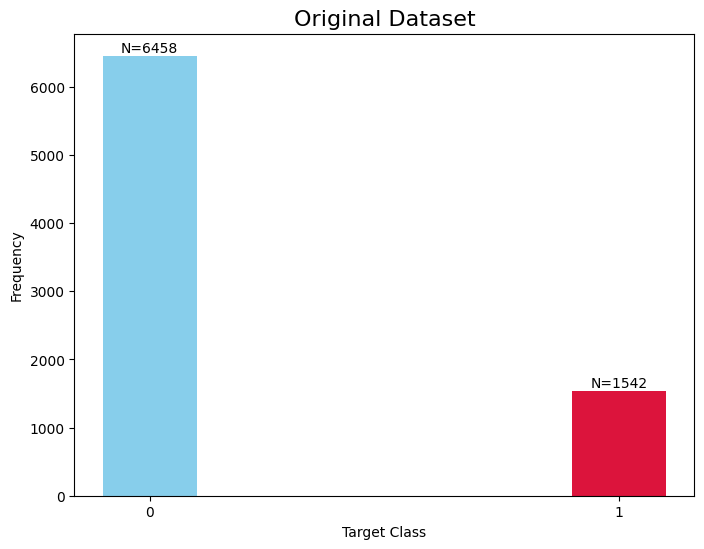

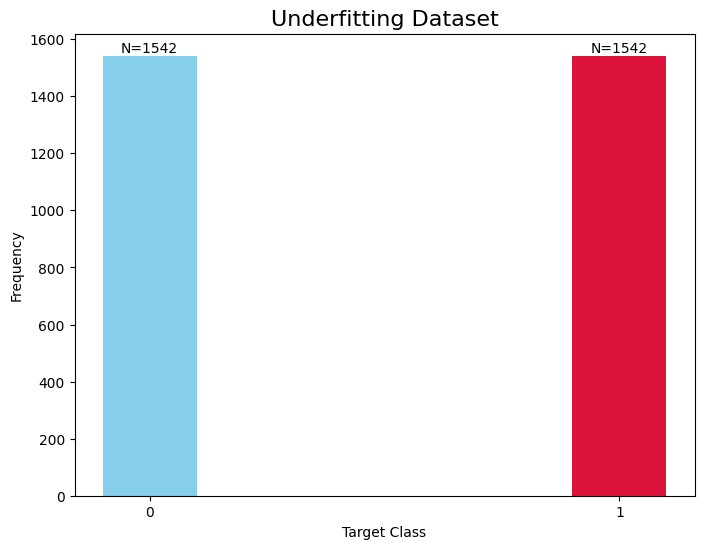

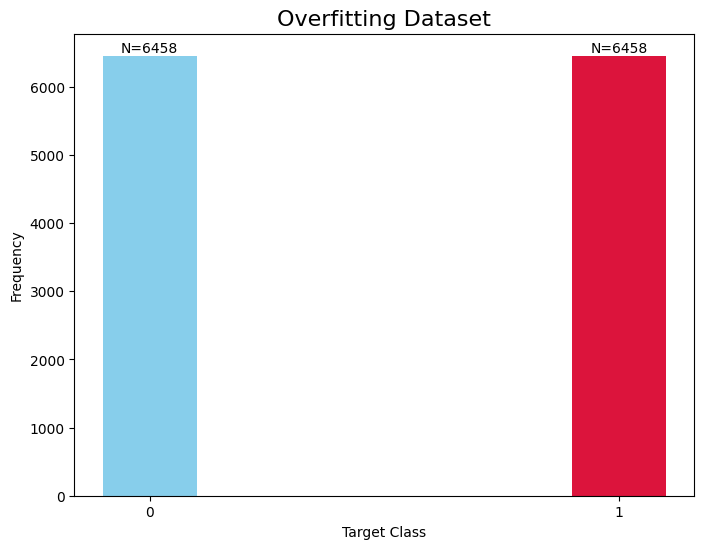

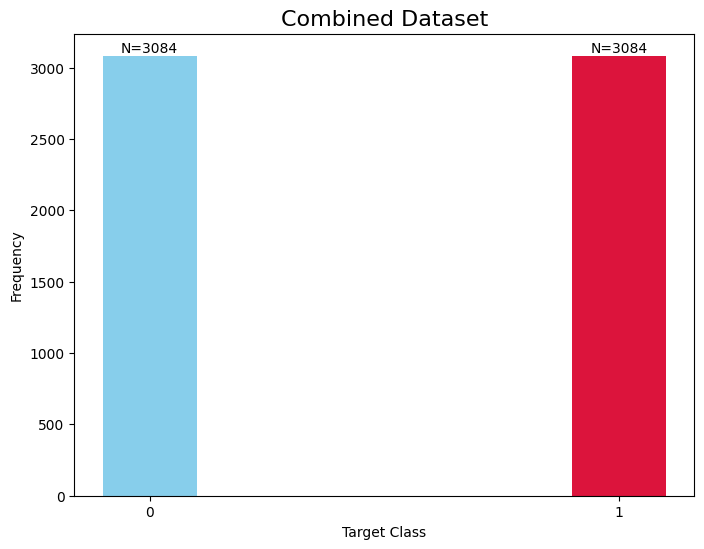

In [387]:
train_target_0 = train[train['target'] == 0]
train_target_1 = train[train['target'] == 1]

print("Classes: ", train["target"].unique())

N0 = train_target_0.shape[0]
N1 = train_target_1.shape[0]

print(f'Number of target 0 samples: {N0}')
print(f'Number of target 1 samples: {N1}')

# Underfitting dataset
train_uf = pd.concat([train_target_0.sample(N1), train_target_1[:N1]])

# Overfitting dataset
train_of_target_1 = train_target_1.sample(N0, replace=True)
min_length = min(train_of_target_1.shape[0], train_target_0.shape[0])
train_of = pd.concat([train_target_0[:min_length], train_of_target_1[:min_length]])

# Combined fitting
train_target_1_comb = train_target_1.sample(2*N1, replace=True)
train_comb = pd.concat([train_target_0.sample(2*N1, replace=False), train_target_1_comb])

print(f'Original dataset size: {train.shape[0]}')
print(f'Underfitting dataset size: {train_uf.shape[0]}')
print(f'Overfitting dataset size: {train_of.shape[0]}')
print(f'Combined dataset size: {train_comb.shape[0]}')

# Plot the datasets

#Original Dataset
plt.figure(figsize=(8, 6))
plt.title('Original Dataset', fontsize=16)

target_counts_of = train['target'].value_counts()

plt.bar(target_counts_of.index, target_counts_of.values, color=['skyblue', 'crimson'], width=0.2)
plt.text(0, target_counts_of[0], f'N={target_counts_of[0]}', ha='center', va='bottom')
plt.text(1, target_counts_of[1], f'N={target_counts_of[1]}', ha='center', va='bottom')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])

# Underfitting Dataset
plt.figure(figsize=(8, 6))
plt.title('Underfitting Dataset', fontsize=16)

target_counts_of = train_uf['target'].value_counts()

plt.bar(target_counts_of.index, target_counts_of.values, color=['skyblue', 'crimson'], width=0.2)
plt.text(0, target_counts_of[0], f'N={target_counts_of[0]}', ha='center', va='bottom')
plt.text(1, target_counts_of[1], f'N={target_counts_of[1]}', ha='center', va='bottom')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])

# Overfitting Dataset
plt.figure(figsize=(8, 6))
plt.title('Overfitting Dataset', fontsize=16)

target_counts_of = train_of['target'].value_counts()

plt.bar(target_counts_of.index, target_counts_of.values, color=['skyblue', 'crimson'], width=0.2)
plt.text(0, target_counts_of[0], f'N={target_counts_of[0]}', ha='center', va='bottom')
plt.text(1, target_counts_of[1], f'N={target_counts_of[1]}', ha='center', va='bottom')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])

# Combined Dataset
plt.figure(figsize=(8, 6))
plt.title('Combined Dataset', fontsize=16)

target_counts_of = train_comb['target'].value_counts()

plt.bar(target_counts_of.index, target_counts_of.values, color=['skyblue', 'crimson'], width=0.2)
plt.text(0, target_counts_of[0], f'N={target_counts_of[0]}', ha='center', va='bottom')
plt.text(1, target_counts_of[1], f'N={target_counts_of[1]}', ha='center', va='bottom')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1])

plt.show()


In [388]:
from sklearn.tree import DecisionTreeClassifier

# Prepare the training and testing datasets
o_X_train = train.drop(columns=['target'])
o_y_train = train['target']

uf_X_train = train_uf.drop(columns=['target'])
uf_y_train = train_uf['target']

of_X_train = train_of.drop(columns=['target'])
of_y_train = train_of['target']

comb_X_train = train_comb.drop(columns=['target'])
comb_y_train = train_comb['target']

X_test_3 = test.drop(columns=['target'])
y_test_3 = test['target']

depth = 5
criteria_options = ['gini', 'entropy', 'log_loss']
tree_criterion = criteria_options[0]


# Initialize the models
dt = DecisionTreeClassifier(max_depth=depth, criterion=tree_criterion)
dt_uf = DecisionTreeClassifier(max_depth=depth, criterion=tree_criterion)
dt_of = DecisionTreeClassifier(max_depth=depth, criterion=tree_criterion)
dt_comb = DecisionTreeClassifier(max_depth=depth, criterion=tree_criterion)

# Fit the models on the training data
dt.fit(o_X_train, o_y_train)
dt_uf.fit(uf_X_train, uf_y_train)
dt_of.fit(of_X_train, of_y_train)
dt_comb.fit(comb_X_train, comb_y_train)

# Evaluate the models
score_3 = dt.score(X_test_3, y_test_3)
score_uf = dt_uf.score(X_test_3, y_test_3)
score_of = dt_of.score(X_test_3, y_test_3)
score_comb = dt_comb.score(X_test_3, y_test_3)

print(f'Original Test Accuracy: {score_3:.4f}')
print(f'Underfitting Test Accuracy: {score_uf:.4f}')
print(f'Overfitting Test Accuracy: {score_of:.4f}')
print(f'Combined Test Accuracy: {score_comb:.4f}')

Original Test Accuracy: 0.8100
Underfitting Test Accuracy: 0.5710
Overfitting Test Accuracy: 0.5855
Combined Test Accuracy: 0.5875


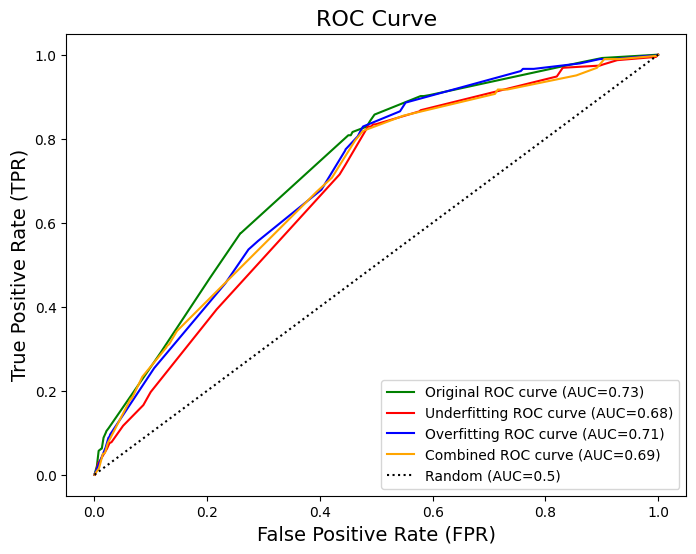

In [389]:
# Make predictions on the test set
predictions_3 = dt.predict(X_test_3)
predictions_uf = dt_uf.predict(X_test_3)
predictions_of = dt_of.predict(X_test_3)
predictions_comb = dt_comb.predict(X_test_3)

# Original Dataset
probabilities = dt.predict_proba(X_test_3)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_3, probabilities, pos_label=1)
auc = round(roc_auc_score(y_test_3, probabilities), 2)

# Underfitting Dataset
probabilities_uf = dt_uf.predict_proba(X_test_3)[:, 1]
fpr_uf, tpr_uf, thresholds_uf = roc_curve(y_test_3, probabilities_uf, pos_label=1)
auc_uf = round(roc_auc_score(y_test_3, probabilities_uf), 2)

# Overfitting Dataset
probabilities_of = dt_of.predict_proba(X_test_3)[:, 1]
fpr_of, tpr_of, thresholds_of = roc_curve(y_test_3, probabilities_of, pos_label=1)
auc_of = round(roc_auc_score(y_test_3, probabilities_of), 2)

# Combined Dataset
probabilities_comb = dt_comb.predict_proba(X_test_3)[:, 1]
fpr_comb, tpr_comb, thresholds_comb = roc_curve(y_test_3, probabilities_comb, pos_label=1)
auc_comb = round(roc_auc_score(y_test_3, probabilities_comb), 2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f"Original ROC curve (AUC={auc})")
plt.plot(fpr_uf, tpr_uf, color='red', label=f"Underfitting ROC curve (AUC={auc_uf})")
plt.plot(fpr_of, tpr_of, color='blue', label=f"Overfitting ROC curve (AUC={auc_of})")
plt.plot(fpr_comb, tpr_comb, color='orange', label=f"Combined ROC curve (AUC={auc_comb})")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend()
plt.show()


### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.


### 1. Accuracy
ROC AUC of 0.73 was achieved using the original dataset

### 2. Discussion

#### 2a)
I tried with different hyperparameters, such as changing the criterion for creating the tree and changing the max-depth. The threshold for classifying was not changed, so a threshold-breaking strategy was just default 0.5.

#### 2b)
Using ROC AUC as a metric instead of classical accuracy can be good to determine if the model is accurate enough with true / false positives. With these examples, having a high accuracy can be misleading when the positive class is highly underrepresented in the dataset. Underfitting / overfitting can be used to cancel this effect, but using ROC AUC as a metric will show more details about how the model actually classifies positive cases.

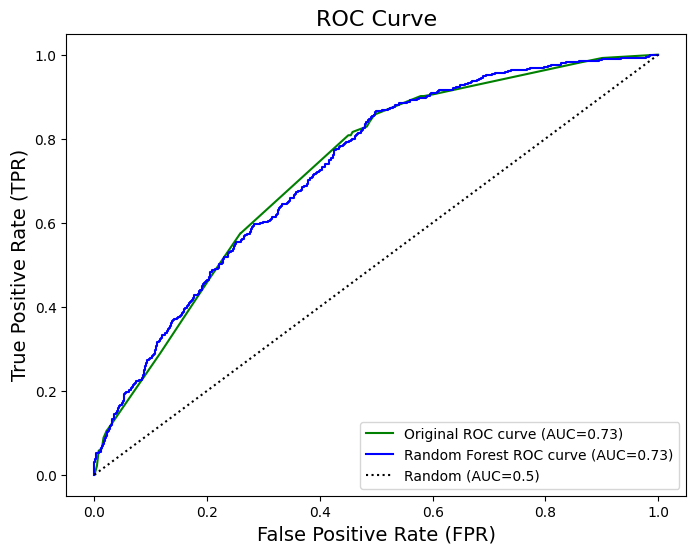

In [390]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')

rfc.fit(o_X_train, o_y_train)

rfc_predictions = rfc.predict_proba(X_test_3)[:, 1]
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test_3, rfc_predictions, pos_label=1)
rfc_auc = round(roc_auc_score(y_test_3, rfc_predictions), 2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f"Original ROC curve (AUC={auc})")
plt.plot(rfc_fpr, rfc_tpr, color='blue', label=f"Random Forest ROC curve (AUC={rfc_auc})")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend()
plt.show()

#### 2c)
As the figure above shows, the Random Forest Classifier can solve the problem quite well, and achieves similar scores almost identical to the original one. This was done without much optimization at all, and shows that it's a good library and solution to these problems


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [20]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [21]:
train.head()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0
1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0
2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0
3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0


In [22]:
test.head()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,NaN,71.4,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,34000000.0
1,NaN,54.0,4.0,50.0,4.0,1.0,NaN,3.00,NaN,NaN,1.0,0.0,NaN,NaN,3.0,1.0,8700000.0
2,3.0,39.4,19.6,11.2,10.0,1.0,NaN,2.65,1.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,6177920.0
3,NaN,60.9,NaN,NaN,5.0,2.0,1.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,8900000.0
4,NaN,34.0,9.0,17.0,14.0,1.0,NaN,2.75,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,5550000.0


In [23]:
train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [24]:
test.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9.937000e+03
mean,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,2.327010e+07
std,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,4.345831e+07
min,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+06
25%,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.599000e+06
50%,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.100000e+07
75%,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.074351e+07
max,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9.285855e+08


Number of train samples: 23285
Number of test samples: 9937


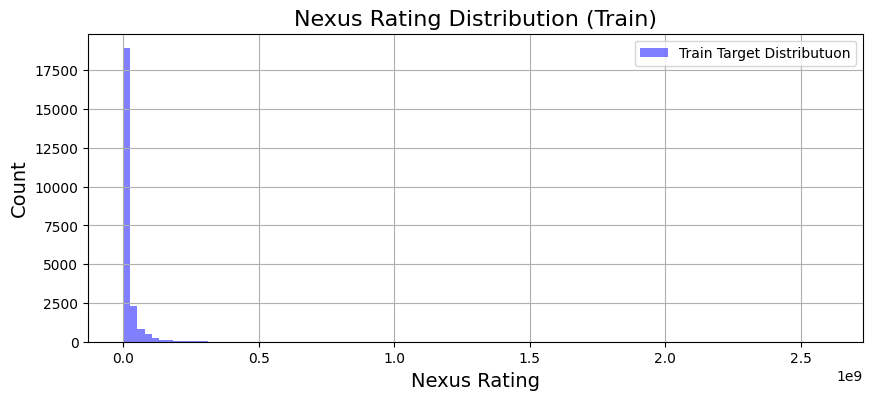

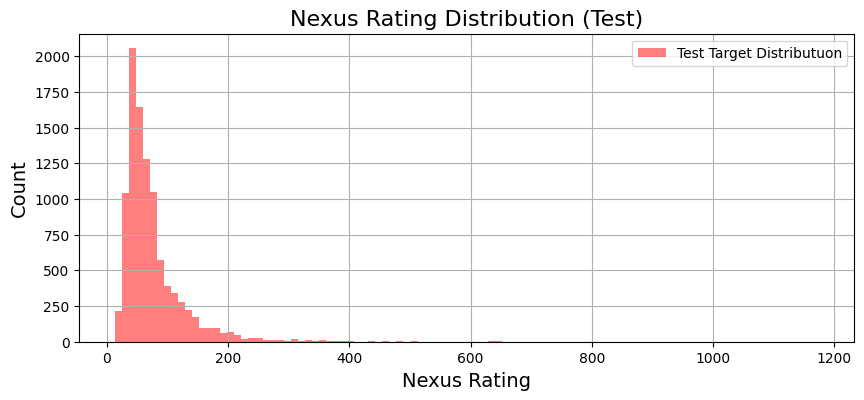

In [25]:
print(f"Number of train samples: {train.shape[0]}")
print(f"Number of test samples: {test.shape[0]}")

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.legend()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='red', alpha=0.5, label='Test Target Distributuon')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.legend()
plt.show()

In [26]:
train_data = train.copy()
train_data.dropna(inplace=True)
train_data.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,1284.000000,1.284000e+03,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,1.075545,1.407531e+07,69.038917,10.110514,41.663442,7.707165,2.552960,1.014798,3.180857,0.397196,0.788162,0.916667,0.419003,0.499221,0.779595,1.298287,1.275701
std,0.772517,2.429002e+07,38.951808,4.701548,23.348758,5.223448,0.705948,0.360478,10.391965,0.681243,0.518091,0.276493,0.493588,0.595514,0.746321,0.779090,0.447041
min,0.000000,3.900000e+06,33.000000,4.600000,2.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,8.496750e+06,51.975000,7.000000,30.400000,4.000000,2.000000,1.000000,2.640000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.015000e+07,60.000000,9.200000,35.450000,7.000000,2.000000,1.000000,2.640000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,1.350000e+07,76.000000,11.000000,45.500000,11.000000,3.000000,1.000000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,2.000000,7.428684e+08,696.000000,47.000000,363.900000,38.000000,6.000000,2.000000,265.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,3.000000,2.000000


In [27]:
test_data = test.copy()
test_data.dropna(inplace=True)
test_data.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,5.180000e+02
mean,1.096525,68.003996,10.038224,41.115618,7.386100,2.530888,0.994208,3.398301,0.370656,0.795367,0.903475,0.384170,0.513514,0.747104,1.386100,1.277992,1.354417e+07
std,0.797935,31.259834,4.534771,18.036336,4.769499,0.677071,0.354530,15.259829,0.650597,0.553359,0.295595,0.486869,0.633381,0.719809,0.851418,0.448443,1.214267e+07
min,0.000000,32.900000,5.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.990000e+06
25%,0.000000,52.000000,7.500000,31.000000,3.000000,2.000000,1.000000,2.640000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.500000e+06
50%,1.000000,60.200000,9.400000,35.000000,6.000000,2.000000,1.000000,2.640000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.025000e+07
75%,2.000000,74.950000,11.000000,45.575000,10.000000,3.000000,1.000000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.375000e+07
max,2.000000,320.000000,50.000000,150.000000,23.000000,5.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,1.319428e+08


In [28]:
nexus_ratings_test = test_data['grid_connections']
fixed_data = pd.DataFrame()
fixed_data['nexus_rating'] = test_data['grid_connections']
fixed_data['ownership_type'] = test_data['ownership_type']
column_values = test_data.copy()
columns = test_data.columns[1:]
for i in range(1, len(columns)):
    fixed_data[columns[i]] = column_values[columns[i-1]]

fixed_data = fixed_data[test_data.columns]
fixed_data.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,518.000000,5.180000e+02,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,1.096525,1.354417e+07,68.003996,10.038224,41.115618,7.386100,2.530888,0.994208,3.398301,0.370656,0.795367,0.903475,0.384170,0.513514,0.747104,1.386100,1.277992
std,0.797935,1.214267e+07,31.259834,4.534771,18.036336,4.769499,0.677071,0.354530,15.259829,0.650597,0.553359,0.295595,0.486869,0.633381,0.719809,0.851418,0.448443
min,0.000000,3.990000e+06,32.900000,5.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,8.500000e+06,52.000000,7.500000,31.000000,3.000000,2.000000,1.000000,2.640000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.025000e+07,60.200000,9.400000,35.000000,6.000000,2.000000,1.000000,2.640000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,1.375000e+07,74.950000,11.000000,45.575000,10.000000,3.000000,1.000000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,2.000000,1.319428e+08,320.000000,50.000000,150.000000,23.000000,5.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [29]:
from sklearn.preprocessing import MinMaxScaler

test_data = fixed_data.copy()

y_train = train_data['nexus_rating']
X_train = train_data.drop(columns=['nexus_rating'])

y_test = test_data['nexus_rating']
X_test = test_data.drop(columns=['nexus_rating'])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.log1p(y_train)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1284, 16)
X_test shape: (518, 16)
y_train shape: (1284,)
y_test shape: (518,)


In [30]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """ 
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [31]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

ensembles = [
    CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=7, early_stopping_rounds=30, verbose=0, loss_function='RMSE', od_type='Iter'),
    RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42, min_samples_leaf=2, min_samples_split=2),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=7, random_state=42)
]

regressor = VotingRegressor(
    estimators=[('catboost', ensembles[0]), ('random_forest', ensembles[1]), ('gradient_boosting', ensembles[2])],
    weights=[1, 1, 1]
)

regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x00000201BCAAAB10>),
                            ('random_forest',
                             RandomForestRegressor(max_depth=7,
                                                   min_samples_leaf=2,
                                                   random_state=42)),
                            ('gradient_boosting',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=7,
                                                       random_state=42))],
                weights=[1, 1, 1])

In [32]:
#example rmsle check
predictions_nexus = np.expm1(regressor.predict(X_test))
print("RMSE:", round(np.sqrt(np.mean((predictions_nexus - y_test)**2)), 2))
print('RMSLE: ', round(rmsle(y_test, predictions_nexus), 3))
print('Required RMSLE: ', 0.294)
use_color = (color.GREEN if rmsle(y_test, predictions_nexus) < 0.294 else color.RED)
if use_color == color.RED:
    print(use_color + 'RMSLE check failed' + color.END)
else:
  print(use_color + 'RMSLE check passed' + color.END)

RMSE: 7855434.32
RMSLE:  0.253
Required RMSLE:  0.294
RMSLE check passed


### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

#### 1. Performance
Using a MinMaxScaler and some ensembling techniques, a RMSLE of 0.253 was achieved. 

#### 2. Discussion
##### a)
I am unsure what a "threshold-breaking strategy" means in relation to a regressor, as there is no classifications or categorization of the predictions. 

##### b) 
RMSLE is an error metric which shows the relative error between the prediction and the actual value. This is due to properties of logarithms. This can be a good metric when the value you're predicting is rather high, which checks if the predictions are good relative to the value you're predicting, not just if they are objectively close. RMSE is a similar metric which calculates the error directly. This metric can show poor results with outliers / bad predictions, even when the model overall performs well. 

In this case, the nexus_rating is quite high. This makes RMSE a bad metric, as we can see that it's quite high. Using RMSLE will result in a much lower score, and can indicate that the predictions are relatively close to actual values. 

##### c)
Below, the feature importances of the three regressors are plotted

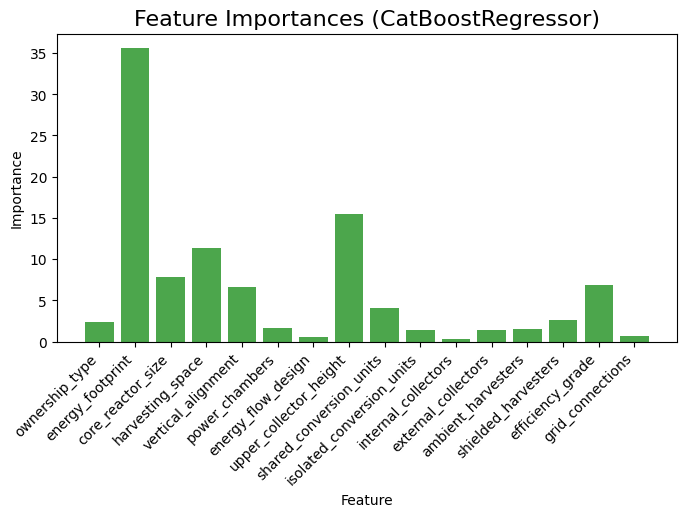

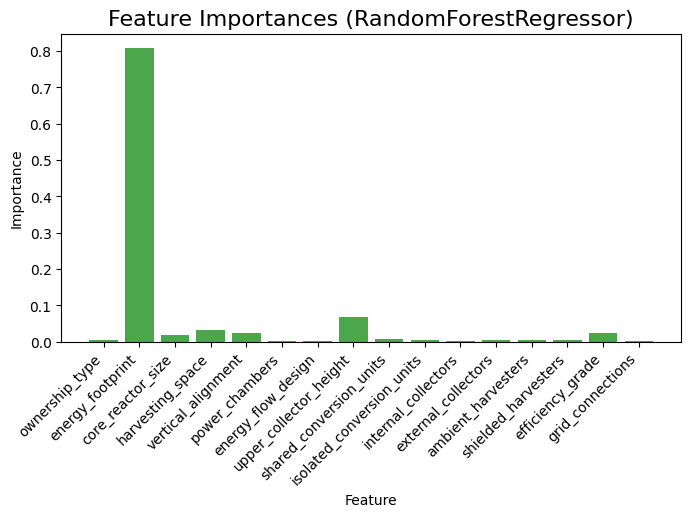

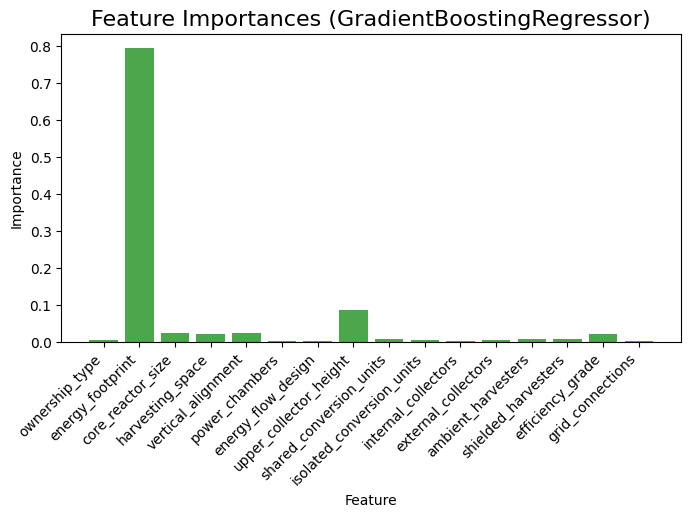

In [404]:
# Feature importances
for ensemble in regressor.estimators_:
  feature_importances = ensemble.feature_importances_

  columns = test_data.columns
  columns = columns.drop('nexus_rating')
  model_name = ensemble.__class__.__name__
  plt.figure(figsize=(8, 4))
  plt.title(f'Feature Importances ({model_name})', fontsize=16)
  plt.bar(columns, feature_importances, color='green', alpha=0.7)
  plt.xlabel('Feature')
  plt.xticks(rotation=45, ha="right")
  plt.ylabel('Importance')
  plt.show()

d. Describe your ensembling techniques

Ensembling techniques used was a parallel ensemble, using three different models. These were trained on the same data. The final prediction was the average of the three separate predictions. This was done using a VotingRegressor, which averages them. The three models used were RandomForestRegressor, CatBoostRegressor and GradientBoostingRegressor.

e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

Using several models makes the final model more robust as the different models may handle real world data differently. Implementing proper checks and validation to the test data, including outlier-handling, will also ensure the model can handle data. This final mission shows how it is important to validate that the test data was generated / gathered in an equal format to that of the training data